<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

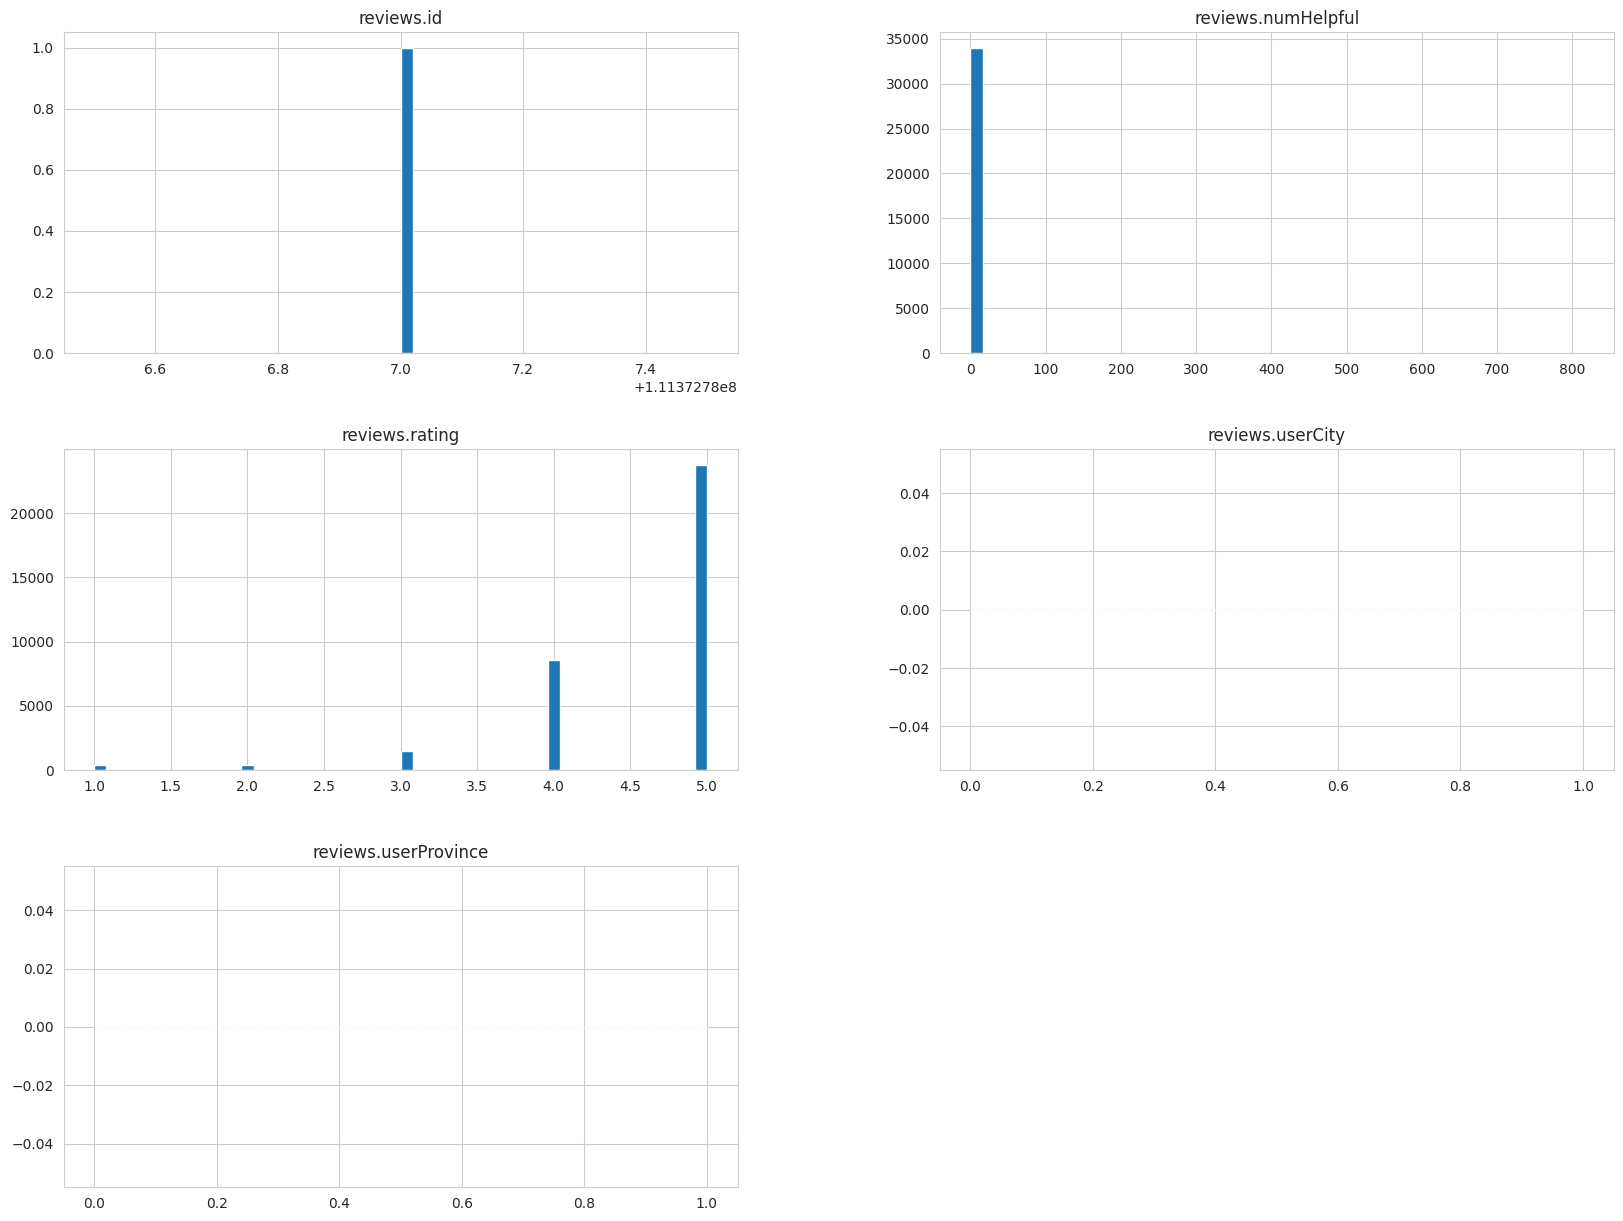

Before 34660
After 34627
<class 'pandas.core.frame.DataFrame'>
Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 

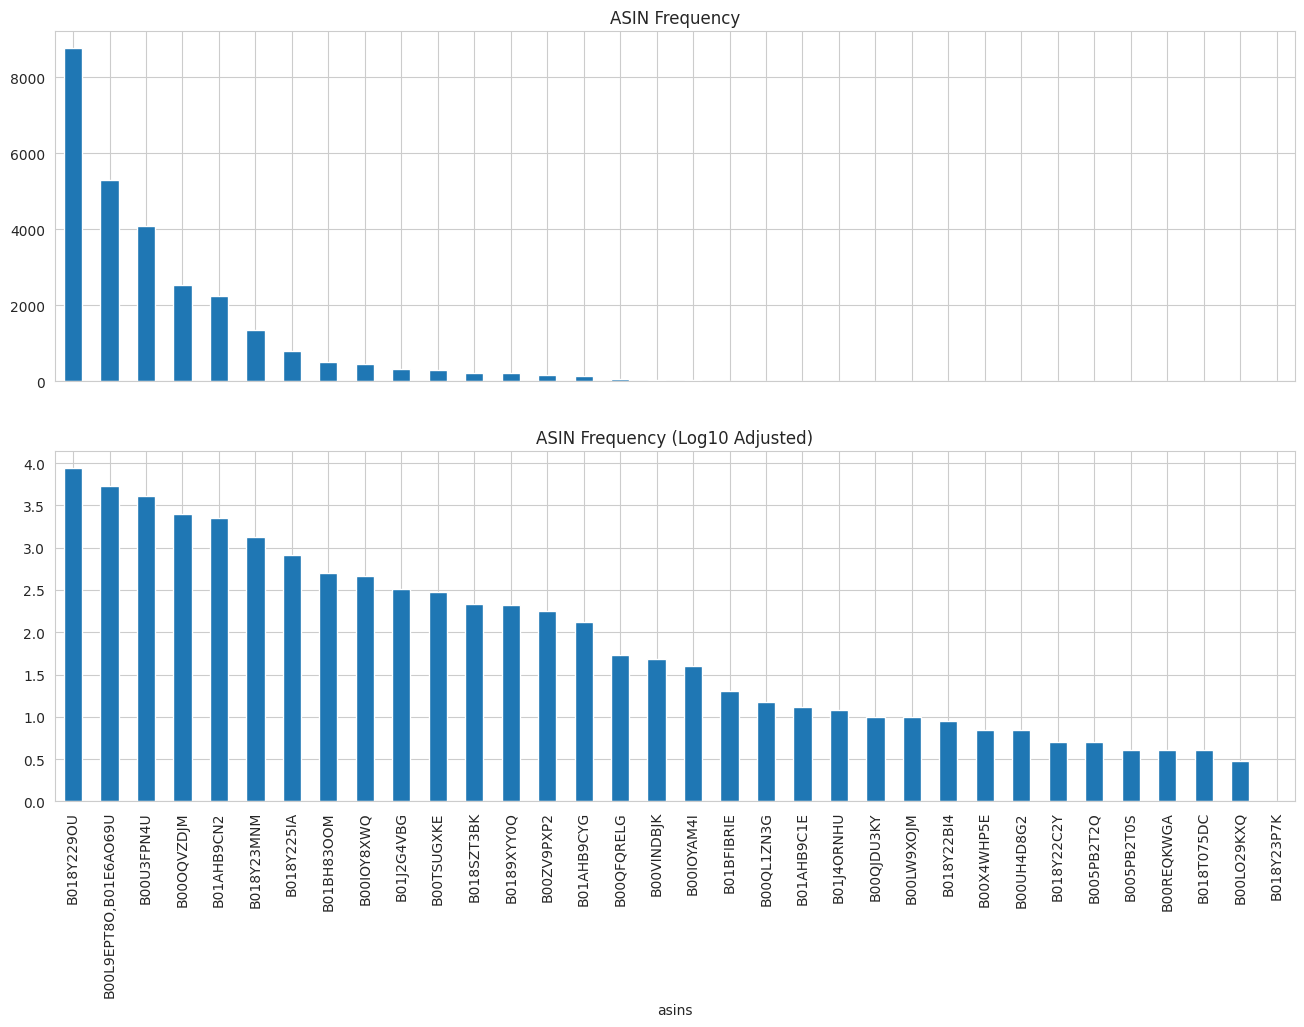

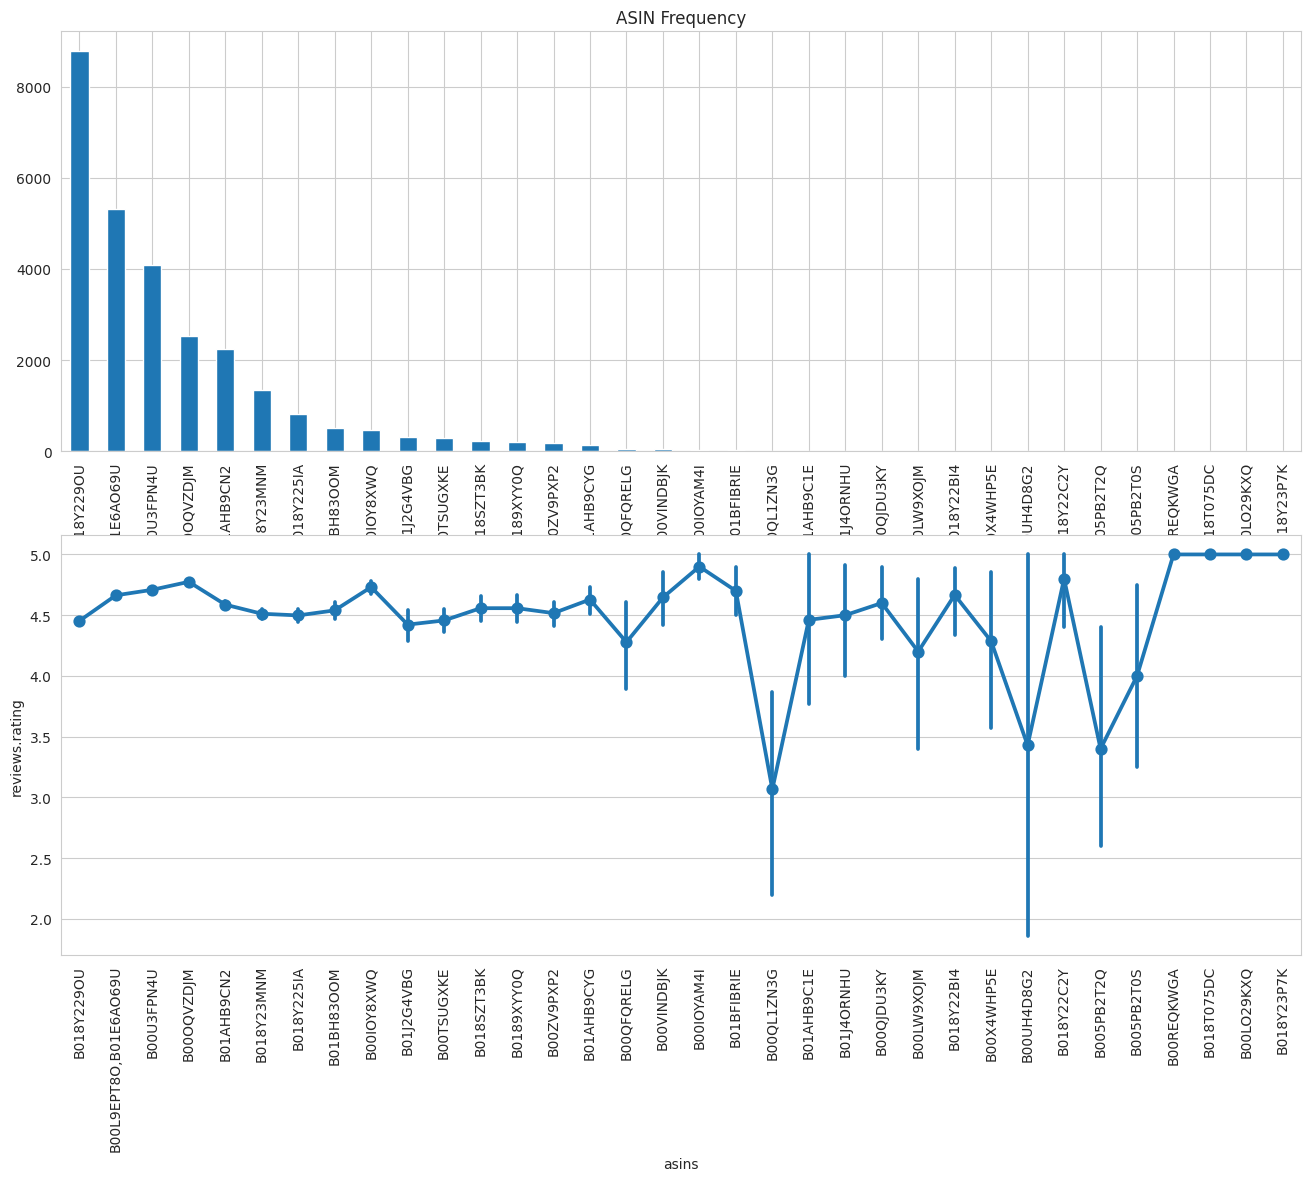

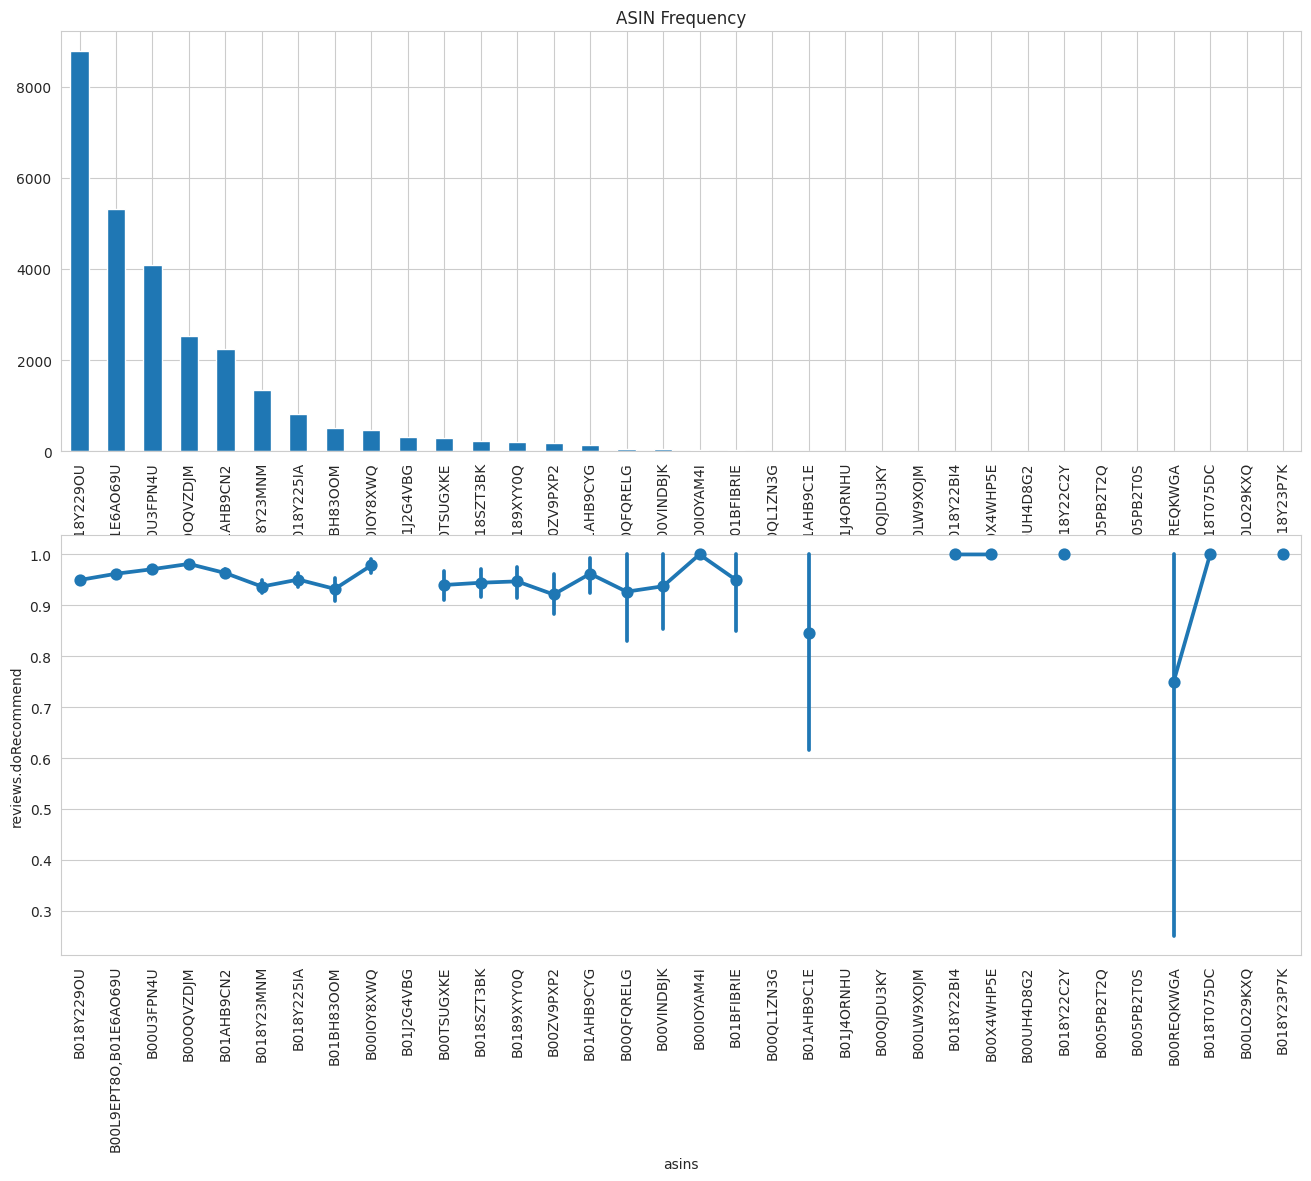

<class 'pandas.core.frame.DataFrame'>
Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceURLs   

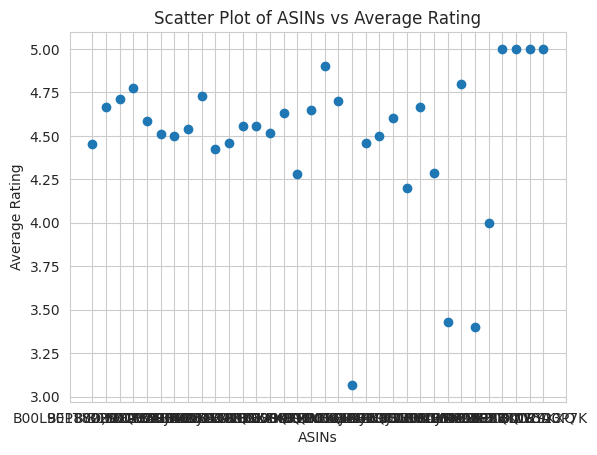

27701 6926


NameError: name 'Pipeline' is not defined

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

warnings.filterwarnings('ignore')  # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
sns.set_style("whitegrid")  # Plotting style
np.random.seed(7)  # seeding random number generator

csv = "1429_1.csv"
df = pd.read_csv(csv)
df.head(2)

data = df.copy()
data.describe()
data.info()
data["asins"].unique()

asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))
data.hist(bins=50, figsize=(20, 15))  # builds histogram and set the number of bins and fig size (width, height)
plt.show()

print("Before {}".format(len(data)))
dataAfter = data.dropna(subset=["reviews.rating"])  # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)
len(strat_train)
strat_train["reviews.rating"].value_counts() / len(strat_train)  # value_count() counts all the values based on column
len(strat_test)
strat_test["reviews.rating"].value_counts() / len(strat_test)
reviews = strat_train.copy()
reviews.head(2)
len(reviews["name"].unique()), len(reviews["asins"].unique())
reviews.info()
reviews.groupby("asins")["name"].unique()
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()
fig = plt.figure(figsize=(16, 10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex=ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)")
plt.show()

reviews["reviews.rating"].mean()
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2, 1, figsize=(16, 12))
plt.subplot(2, 1, 1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2, 1, 2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()
plt.subplots(2, 1, figsize=(16, 12))
plt.subplot(2, 1, 1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2, 1, 2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

# Select only numeric columns for computing the correlation matrix
numeric_columns = reviews.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

reviews.info()

counts = reviews["asins"].value_counts().to_frame()
counts.head()
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()
table = counts.join(avg_rating)
table.head(30)

plt.scatter(table.index, table["reviews.rating"])
plt.xlabel("ASINs")
plt.ylabel("Average Rating")
plt.title("Scatter Plot of ASINs vs Average Rating")
plt.show()

table.corr()
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"


# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurrence counting
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)

predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()),
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
             'tfidf__use_idf': (True, False),
             }
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.",  # positive
            "The tablet is ok, but it works fine.",  # neutral
            "The tablet is not good, does not work very well."]  # negative

predictions = gs_clf_LinearSVC_pipe.predict(new_text)
sentiments = ['Positive' if pred == 1 else 'Neutral' if pred == 0 else 'Negative' for pred in predictions]
print(sentiments)

predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_,
                             gs_clf_LinearSVC_pipe.best_estimator_,
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

from sklearn import metrics



# Model evaluation
print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'.format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))
print(metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))

